In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

Import data
---



In [ ]:
mnist = keras.datasets.mnist

Data partionning
---



In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,)


In [ ]:
y_train[0]

5

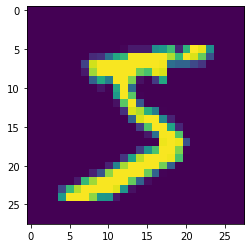

In [ ]:
plt.imshow(x_train[0])

Pre-processing
---



In [ ]:
# scale the data
x_train, x_test = x_train/255. , x_test/255.

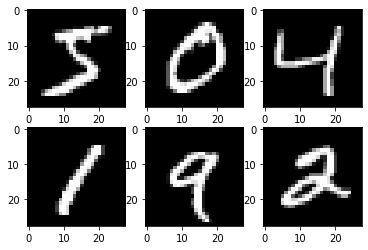

In [ ]:
# show data
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(x_train[i], cmap='gray')

Model building
---



In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPool2D((2,2)),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),

    keras.layers.Flatten(),

    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10, activation='softmax')

])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 512)               8

In [ ]:
loss = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.Adam(learning_rate=1e-4)
metrics = ['accuracy']

In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

Model training
---



In [ ]:
# training
batch_size = 64
epochs = 2

history = model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs,
                    validation_data=(x_test,y_test))

Epoch 1/2
938/938 [==============================] - 16s 5ms/step - loss: 0.3847 - accuracy: 0.9002 - val_loss: 0.1157 - val_accuracy: 0.9659
Epoch 2/2
938/938 [==============================] - 4s 4ms/step - loss: 0.1023 - accuracy: 0.9696 - val_loss: 0.0715 - val_accuracy: 0.9778


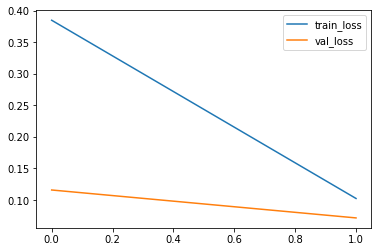

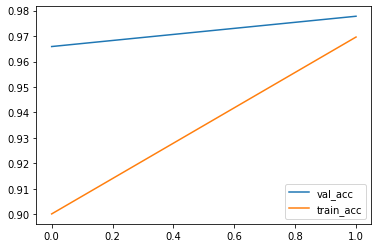

In [ ]:
# plot loss and metric / epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


plt.plot(loss, label='train_loss')
plt.plot( val_loss, label='val_loss')
plt.legend()

plt.figure()
plt.plot(val_acc, label='val_acc')
plt.plot(acc, label='train_acc')

plt.legend()

plt.show()

Model evaluation
---



In [ ]:
# evaluate
model.evaluate(x_test, y_test, batch_size=batch_size)

157/157 [==============================] - 0s 3ms/step - loss: 0.0715 - accuracy: 0.9778


[0.07148436456918716, 0.9778000116348267]

Model testing
---



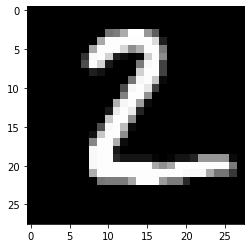

In [ ]:
x_pred = x_test[1]
plt.imshow(x_pred, 'gray')

In [ ]:
x_pred.shape

(28, 28)

In [ ]:
prediction = model.predict(x_pred.reshape(1,28,28,1))
result = np.argmax(prediction)
prediction

1/1 [==============================] - 0s 122ms/step


array([[2.6146646e-04, 3.9763539e-03, 9.9544525e-01, 8.0858139e-05,
        1.5243421e-08, 1.2766716e-07, 1.7500388e-04, 2.8605289e-09,
        6.1012870e-05, 2.4317670e-10]], dtype=float32)

In [ ]:
result

2

In [ ]:
np.sum(prediction)

1.0000001

Save model

In [ ]:
model.save('model1.h5')